# Final Project
Albert Xu & Regina Zbarskaya

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.decomposition.pca import PCA
from sklearn.model_selection import train_test_split

In [2]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
df1 = pd.read_csv('winequality-red.csv', delimiter=';')
df2 = pd.read_csv('winequality-white.csv', delimiter=';')
red = df1.values
white = df2.values
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [3]:
red = np.hstack((df1.values, np.ones((red.shape[0], 1))))
white = np.hstack((df2.values, np.zeros((white.shape[0], 1))))
X = np.vstack((red, white))
X, y = X[:,:-1], X[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
#print(red.shape, white.shape)
#print(X.shape)
#print(X_train.shape, X_test.shape)
#print(y_train)

In [4]:
def logreg_acc(X_train, y_train, X_test, y_test, penalty='l2'):
    model = LogisticRegression(penalty=penalty)
    model.fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test, y_test)

logreg_acc(X_train, y_train, X_test, y_test)

(0.9799876847290641, 0.9787626962142197)

In [5]:
def svm_acc(X_train, y_train, X_test, y_test, penalty='l2'):
    model = LinearSVC(penalty=penalty)
    model.fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test, y_test)

svm_acc(X_train, y_train, X_test, y_test)

(0.9802955665024631, 0.9812249923053247)

In [6]:
import keras
from keras.layers import Dense

class AccHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.acc = []
 
    def on_batch_end(self, batch, logs={}):
        self.loss.append(logs.get('loss'))
        
    def on_epoch_end(self, epoch, logs):
        self.acc.append(logs.get('acc'))


keras.backend.clear_session()
cb = AccHistory()
model = keras.models.Sequential()
model.add(Dense(10, activation='sigmoid', input_dim=12))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

/Users/albertxu/Documents/nyu/sophomore/machine_learning_hw/mlenv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[cb])

Train on 3248 samples, validate on 3249 samples
Epoch 1/30
3248/3248 [==============================] - 1s 174us/step - loss: 0.2080 - acc: 0.7442 - val_loss: 0.1883 - val_acc: 0.7535
Epoch 2/30
3248/3248 [==============================] - 0s 74us/step - loss: 0.1817 - acc: 0.7543 - val_loss: 0.1774 - val_acc: 0.7535
Epoch 3/30
3248/3248 [==============================] - 0s 70us/step - loss: 0.1746 - acc: 0.7543 - val_loss: 0.1725 - val_acc: 0.7535
Epoch 4/30
3248/3248 [==============================] - 0s 68us/step - loss: 0.1705 - acc: 0.7543 - val_loss: 0.1687 - val_acc: 0.7535
Epoch 5/30
3248/3248 [==============================] - 0s 71us/step - loss: 0.1669 - acc: 0.7543 - val_loss: 0.1651 - val_acc: 0.7535
Epoch 6/30
3248/3248 [==============================] - 0s 72us/step - loss: 0.1631 - acc: 0.7543 - val_loss: 0.1615 - val_acc: 0.7535
Epoch 7/30
3248/3248 [==============================] - 0s 67us/step - loss: 0.1593 - acc: 0.7543 - val_loss: 0.1579 - val_acc: 0.7535
Epoch 

Test Loss: 	0.10512682795524597
Test Accuracy: 	0.9273622632026672


Text(0.5,0,'batch')

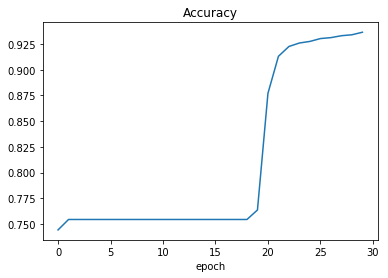

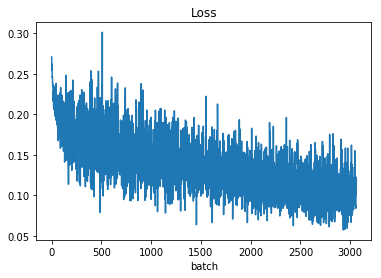

In [8]:
print("Test Loss: \t{}\nTest Accuracy: \t{}".format(*model.test_on_batch(X_test, y_test)))
plt.plot(cb.acc)
plt.title('Accuracy')
plt.xlabel('epoch')
plt.figure()
plt.plot(cb.loss)
plt.title('Loss')
plt.xlabel('batch')

In [9]:
def pca_transform(X, n_components):
    pca = PCA(n_components)
    pca.fit(X)
    return pca.transform(X)

Text(0,0.5,'accuracy')

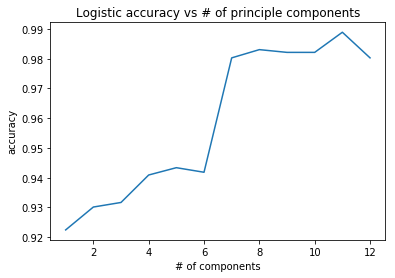

In [10]:
test_acc = []
for i in range(1, 13):
    X2_train, X2_test, y_train, y_test = train_test_split(pca_transform(X, i), y, test_size=0.5)
    acc = logreg_acc(X2_train, y_train, X2_test, y_test)
    #print("Accuracy of %d components: %r" % (i, acc))
    test_acc.append(acc[1])

plt.plot(range(1, 13), test_acc)
plt.title('Logistic accuracy vs # of principle components')
plt.xlabel('# of components')
plt.ylabel('accuracy')

Text(0,0.5,'accuracy')

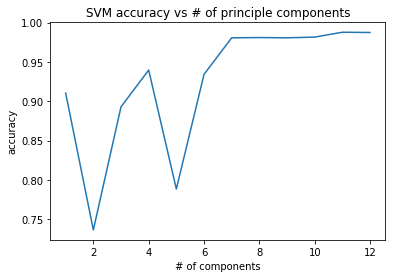

In [11]:
test_acc = []
for i in range(1, 13):
    X2_train, X2_test, y_train, y_test = train_test_split(pca_transform(X, i), y, test_size=0.5)
    acc = svm_acc(X2_train, y_train, X2_test, y_test)
    #print("Accuracy of %d components: %r" % (i, acc))
    test_acc.append(acc[1])

plt.plot(range(1, 13), test_acc)
plt.title('SVM accuracy vs # of principle components')
plt.xlabel('# of components')
plt.ylabel('accuracy')